# Online Sexism Detection

#### I have used Word2vec embedding, TF-IDF Vectorizer and a Neural Network for this project

In [1]:
#importing necessary dependencies

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale


#NLP tools
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import multiprocessing
from time import time
from gensim.models import Word2Vec



#train split and fit models
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, f1_score

#neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("train_all_tasks.csv")

In [3]:
df.head()

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


In [4]:
df.shape

(14000, 5)

In [5]:
df.drop('rewire_id', axis=1, inplace=True) 
df.head()

,text,label_sexist,label_category,label_vector
0,"Damn, this writing was pretty chaotic",not sexist,none,none
1,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,Understand. Know you're right. At same time I ...,not sexist,none,none
4,Surprized they didn't stop and rape some women,not sexist,none,none


#### DATA CLEANING FOR TASK A and B

In [6]:
def clean_text(text):
    # Remove any non-alphanumeric characters except whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [7]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def remove_stopwords(text):
    """
    Function to remove stop words from text.
    
    Parameters:
        text (str): Input text.
        
    Returns:
        str: Text with stop words removed.
    """
    # Tokenize the text
    words = text.split()
    # Remove stop words
    filtered_words = [word for word in words if word not in stop_words]
    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

def lemmatize_text(text):
    """
    Function to lemmatize words in text.
    
    Parameters:
        text (str): Input text.
        
    Returns:
        str: Text with lemmatized words.
    """
    # Tokenize the text
    words = text.split()
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [8]:
# Apply cleaning function
df['text'] = df['text'].apply(clean_text)

# Remove stop words
df['text'] = df['text'].apply(remove_stopwords)

# Lemmatize words
df['text'] = df['text'].apply(lemmatize_text)


In [9]:
df.head()

,text,label_sexist,label_category,label_vector
0,damn writing pretty chaotic,not sexist,none,none
1,yeah apparently bunch misogynistic virgin one ...,not sexist,none,none
2,fuck woman still mp,not sexist,none,none
3,understand know youre right time know isnt eno...,not sexist,none,none
4,surprized didnt stop rape woman,not sexist,none,none


## TASK A SOLUTION

In [10]:
dfA = df[['text', 'label_sexist']]
dfA.head()

,text,label_sexist
0,damn writing pretty chaotic,not sexist
1,yeah apparently bunch misogynistic virgin one ...,not sexist
2,fuck woman still mp,not sexist
3,understand know youre right time know isnt eno...,not sexist
4,surprized didnt stop rape woman,not sexist


#### LABEL ENCODER

In [11]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class labels
dfA['encoded_labels'] = label_encoder.fit_transform(dfA['label_sexist'])
dfA.head()

,text,label_sexist,encoded_labels
0,damn writing pretty chaotic,not sexist,0
1,yeah apparently bunch misogynistic virgin one ...,not sexist,0
2,fuck woman still mp,not sexist,0
3,understand know youre right time know isnt eno...,not sexist,0
4,surprized didnt stop rape woman,not sexist,0


In [12]:
dfA.drop('label_sexist', axis=1, inplace=True) 
dfA.head()

,text,encoded_labels
0,damn writing pretty chaotic,0
1,yeah apparently bunch misogynistic virgin one ...,0
2,fuck woman still mp,0
3,understand know youre right time know isnt eno...,0
4,surprized didnt stop rape woman,0


In [13]:
type(dfA['encoded_labels'])

pandas.core.series.Series

In [14]:
dfA['encoded_labels'].value_counts()

0    10602
1     3398
Name: encoded_labels, dtype: int64

In [15]:
type(dfA['encoded_labels'].values)

numpy.ndarray

In [16]:
# Tokenize the 'text' column
dfA['tokenized_text'] = dfA['text'].apply(word_tokenize)
dfA.head()

,text,encoded_labels,tokenized_text
0,damn writing pretty chaotic,0,"[damn, writing, pretty, chaotic]"
1,yeah apparently bunch misogynistic virgin one ...,0,"[yeah, apparently, bunch, misogynistic, virgin..."
2,fuck woman still mp,0,"[fuck, woman, still, mp]"
3,understand know youre right time know isnt eno...,0,"[understand, know, youre, right, time, know, i..."
4,surprized didnt stop rape woman,0,"[surprized, didnt, stop, rape, woman]"


In [17]:
dfA.shape

(14000, 3)

#### WORD2VEC

In [18]:
# import gensim
# w2v_model = gensim.models.KeyedVectors.load_word2vec_format('google_news/GoogleNews-vectors-negative300.bin', 
#                                                             binary=True)

In [19]:
cores = multiprocessing.cpu_count() 
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=400,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

#BUILD_VOCAB()
t = time()
w2v_model.build_vocab(dfA["tokenized_text"], progress_per=1000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

#TRAIN()
w2v_model.train(dfA["tokenized_text"], total_examples=w2v_model.corpus_count, 
                epochs=10000, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))


Time to build vocab: 0.0 mins
Time to train the model: 13.2 mins


#### DATA SPLIT

In [20]:
#First defining the X (input), and the y (output)
y = dfA['encoded_labels'].values
X = np.array(dfA["tokenized_text"])

#And here is the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11200,), (2800,), (11200,), (2800,))

#### VECTORIZATION USING TFIDF

In [22]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print ('vocab size :', len(tfidf))

vocab size : 2065


In [23]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += w2v_model.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [24]:
train_vecs_w2v = np.concatenate([buildWordVector(z, 400) for z in map(lambda x: x, X_train)])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 400) for z in map(lambda x: x, X_test)])
test_vecs_w2v = scale(test_vecs_w2v)

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

shape for training set :  (11200, 400) 
shape for test set :  (2800, 400)


In [25]:
train_vecs_w2v, test_vecs_w2v, y_train, y_test

(array([[ 0.41250008, -1.62759195,  0.77821758, ...,  1.5837894 ,
          0.34137197, -0.32788489],
        [-0.12631242, -1.72849389, -0.59317244, ...,  0.46450648,
         -0.77218602, -0.24051288],
        [ 0.23819589,  0.37222647,  1.2234177 , ...,  0.74665645,
         -0.5022855 ,  0.33780658],
        ...,
        [-0.35946962,  1.37430867, -1.12566487, ...,  0.7027053 ,
          0.56285702,  0.16331734],
        [ 0.67822016,  0.79703807,  0.57112434, ..., -0.61786748,
          0.0614133 ,  0.21896317],
        [ 1.72136629,  2.02530346,  0.83799625, ..., -0.26304677,
         -0.02345419, -0.30237666]]),
 array([[-0.56159464, -0.35922628,  0.04243642, ..., -0.31561344,
         -0.54606761,  1.1265731 ],
        [-2.02455719, -0.89762008, -2.74893847, ...,  1.48615621,
         -1.36223458, -0.92727777],
        [-0.05229802, -1.98073101, -0.12859012, ...,  1.24738285,
          0.08911191, -0.96869533],
        ...,
        [-0.26330027,  0.1330464 ,  0.16650602, ...,  

#### BUILDING THE NEURAL MODEL

In [26]:
model = Sequential()

model.add(Dense(256, input_dim=400))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.65))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               102656    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 102913 (402.00 KB)
Trainable params: 102913 (402.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
history = model.fit(train_vecs_w2v, y_train, epochs=60, batch_size=40,
                   validation_data=(test_vecs_w2v,y_test))
loss, accuracy = model.evaluate(train_vecs_w2v, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_vecs_w2v, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/60
280/280 [==============================] - 1s 2ms/step - loss: 0.6053 - accuracy: 0.7351 - val_loss: 0.5093 - val_accuracy: 0.7796
Epoch 2/60
280/280 [==============================] - 1s 2ms/step - loss: 0.4897 - accuracy: 0.7850 - val_loss: 0.4983 - val_accuracy: 0.7829
Epoch 3/60
280/280 [==============================] - 1s 2ms/step - loss: 0.4487 - accuracy: 0.8021 - val_loss: 0.4931 - val_accuracy: 0.7854
Epoch 4/60
280/280 [==============================] - 1s 2ms/step - loss: 0.4281 - accuracy: 0.8136 - val_loss: 0.4969 - val_accuracy: 0.7868
Epoch 5/60
280/280 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.8168 - val_loss: 0.4937 - val_accuracy: 0.7850
Epoch 6/60
280/280 [==============================] - 1s 2ms/step - loss: 0.4106 - accuracy: 0.8216 - val_loss: 0.4988 - val_accuracy: 0.7900
Epoch 7/60
280/280 [==============================] - 1s 2ms/step - loss: 0.4010 - accuracy: 0.8257 - val_loss: 0.5020 - val_accuracy: 0.7907
Epoch 

280/280 [==============================] - 1s 2ms/step - loss: 0.1869 - accuracy: 0.9278 - val_loss: 0.7422 - val_accuracy: 0.7950
Epoch 59/60
280/280 [==============================] - 1s 2ms/step - loss: 0.1793 - accuracy: 0.9299 - val_loss: 0.7588 - val_accuracy: 0.7939
Epoch 60/60
280/280 [==============================] - 1s 2ms/step - loss: 0.1869 - accuracy: 0.9261 - val_loss: 0.7541 - val_accuracy: 0.7939
Training Accuracy: 0.9875
Testing Accuracy:  0.7939


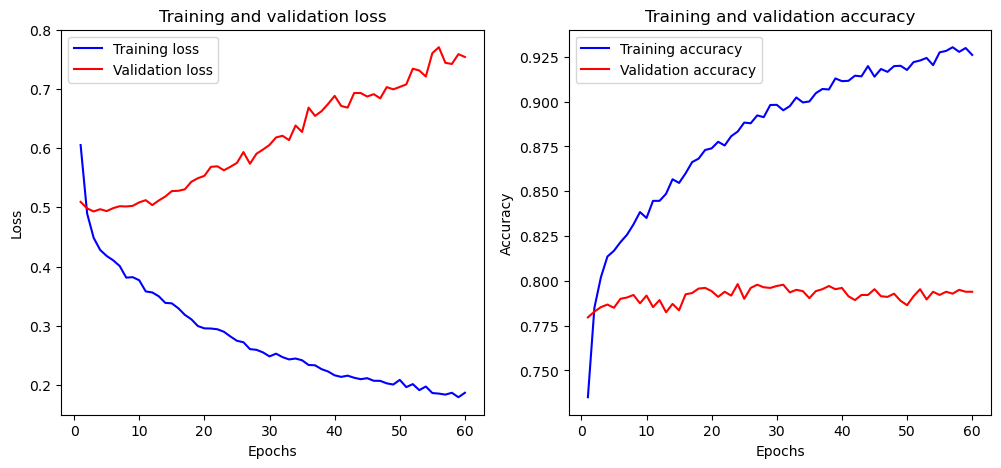

In [28]:
def plot_history(history):
    train_loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']
    train_acc_values = history.history['accuracy']
    val_acc_values = history.history['val_accuracy']
    epochs = range(1, len(train_loss_values) + 1)

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc_values, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

#### Overall Accuracy and F1-Score for Task A:

In [29]:
# Predict classes for the test set
y_pred_prob = model.predict(test_vecs_w2v)

# Convert y_pred to 1D array
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

88/88 [==============================] - 0s 863us/step
Accuracy: 0.7939285714285714
F1 Score: 0.770626370878434


In [30]:
# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2096
           1       0.67      0.36      0.47       704

    accuracy                           0.79      2800
   macro avg       0.74      0.65      0.67      2800
weighted avg       0.78      0.79      0.77      2800



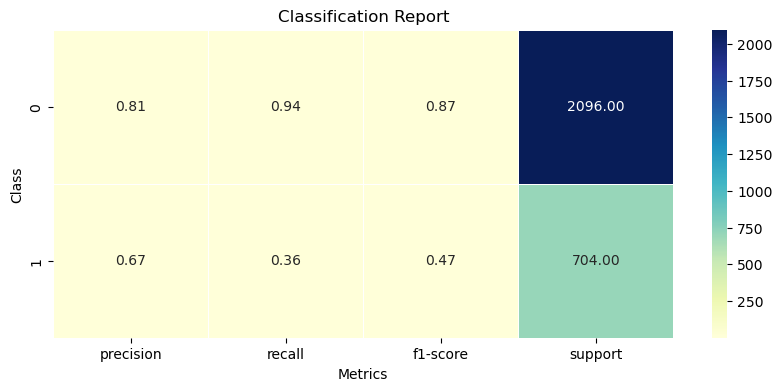

In [57]:
# Sample classification report data
report_data = {
    "precision": [0.81, 0.67],
    "recall": [0.94, 0.36],
    "f1-score": [0.87, 0.47],
    "support": [2096, 704]
}

# Convert the data into a DataFrame
df_report = pd.DataFrame(report_data, index=["0", "1"])

# Plot the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# TASK B SOLUTION

In [32]:
df.head()

,text,label_sexist,label_category,label_vector
0,damn writing pretty chaotic,not sexist,none,none
1,yeah apparently bunch misogynistic virgin one ...,not sexist,none,none
2,fuck woman still mp,not sexist,none,none
3,understand know youre right time know isnt eno...,not sexist,none,none
4,surprized didnt stop rape woman,not sexist,none,none


In [33]:
df[df['label_sexist'] == 'sexist']['label_category'].value_counts()

2. derogation                               1590
3. animosity                                1165
4. prejudiced discussions                    333
1. threats, plans to harm and incitement     310
Name: label_category, dtype: int64

In [34]:
#creating a new dataframe dfB for task B

dfB = df[df['label_sexist'] == 'sexist'][['text', 'label_category']]
dfB['label_category'].value_counts()

2. derogation                               1590
3. animosity                                1165
4. prejudiced discussions                    333
1. threats, plans to harm and incitement     310
Name: label_category, dtype: int64

In [35]:
dfB.shape

(3398, 2)

In [36]:
dfB.head()

,text,label_category
8,inside wallet cash bank card credit card debit...,2. derogation
11,get initial chance attractive woman flock see ...,2. derogation
17,ugly chick pussy pussy,2. derogation
18,fuck nine mm get arab fuck monkey,"1. threats, plans to harm and incitement"
19,talk shit idiot like nazi like bitch,3. animosity


#### ONE HOT ENCODING

In [37]:
y_encoded = pd.get_dummies(dfB['label_category'])
dfB = pd.concat([dfB, y_encoded], axis=1)

In [38]:
y_encoded

,"1. threats, plans to harm and incitement",2. derogation,3. animosity,4. prejudiced discussions
8,0,1,0,0
11,0,1,0,0
17,0,1,0,0
18,1,0,0,0
19,0,0,1,0
...,...,...,...,...
13977,0,1,0,0
13990,0,0,1,0
13993,0,0,0,1
13994,0,1,0,0


In [39]:
type(y_encoded.values)

numpy.ndarray

In [40]:
dfB.head()

,text,label_category,"1. threats, plans to harm and incitement",2. derogation,3. animosity,4. prejudiced discussions
8,inside wallet cash bank card credit card debit...,2. derogation,0,1,0,0
11,get initial chance attractive woman flock see ...,2. derogation,0,1,0,0
17,ugly chick pussy pussy,2. derogation,0,1,0,0
18,fuck nine mm get arab fuck monkey,"1. threats, plans to harm and incitement",1,0,0,0
19,talk shit idiot like nazi like bitch,3. animosity,0,0,1,0


In [41]:
# Tokenize the 'text' column
dfB['tokenized_text'] = dfB['text'].apply(word_tokenize)
dfB.head()

,text,label_category,"1. threats, plans to harm and incitement",2. derogation,3. animosity,4. prejudiced discussions,tokenized_text
8,inside wallet cash bank card credit card debit...,2. derogation,0,1,0,0,"[inside, wallet, cash, bank, card, credit, car..."
11,get initial chance attractive woman flock see ...,2. derogation,0,1,0,0,"[get, initial, chance, attractive, woman, floc..."
17,ugly chick pussy pussy,2. derogation,0,1,0,0,"[ugly, chick, pussy, pussy]"
18,fuck nine mm get arab fuck monkey,"1. threats, plans to harm and incitement",1,0,0,0,"[fuck, nine, mm, get, arab, fuck, monkey]"
19,talk shit idiot like nazi like bitch,3. animosity,0,0,1,0,"[talk, shit, idiot, like, nazi, like, bitch]"


In [42]:
dfB.shape

(3398, 7)

#### WORD2VEC

In [43]:
#WORD2VEC()
cores = multiprocessing.cpu_count() # Count the number of cores in a computer, important for a parameter of the model
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=400,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

#BUILD_VOCAB()
t = time()
w2v_model.build_vocab(dfB["tokenized_text"], progress_per=1000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

#TRAIN()
w2v_model.train(dfB["tokenized_text"], total_examples=w2v_model.corpus_count, epochs=10000, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))


Time to build vocab: 0.0 mins
Time to train the model: 2.94 mins


#### DATA SPLIT

In [44]:
#First defining the X (input), and the y (output)
y = y_encoded.values
X = np.array(dfB["tokenized_text"])

#And here is the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2718,), (680,), (2718, 4), (680, 4))

#### VECTORIZATION USING TFIDF

In [46]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print ('vocab size :', len(tfidf))

vocab size : 622


In [47]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += w2v_model.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [48]:
train_vecs_w2v = np.concatenate([buildWordVector(z, 400) for z in map(lambda x: x, X_train)])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 400) for z in map(lambda x: x, X_test)])
test_vecs_w2v = scale(test_vecs_w2v)

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

shape for training set :  (2718, 400) 
shape for test set :  (680, 400)


In [49]:
train_vecs_w2v, test_vecs_w2v, y_train,  y_test

(array([[ 0.04631616,  1.15395253,  0.95059542, ...,  1.48497073,
         -0.01341365, -0.76307893],
        [-0.39245344, -0.27540031, -0.58394321, ...,  0.69750444,
          0.85847825, -0.86259454],
        [-0.09853987,  0.43069915, -0.62917947, ..., -1.24899899,
         -0.65077839, -1.56850464],
        ...,
        [-0.41668288,  1.06511206, -2.30052729, ...,  0.5487524 ,
         -0.44551306, -2.06808593],
        [-0.31422788,  0.04158512, -1.00332975, ..., -0.50398523,
         -1.3024071 , -1.83104213],
        [-0.67795004,  1.43080355,  0.34478647, ..., -1.14744644,
          2.44594466,  0.26660746]]),
 array([[-0.23249738,  0.14407921,  0.19375827, ...,  1.20538086,
          1.6323735 , -0.97686754],
        [ 1.1672928 ,  0.31233745, -0.19531694, ...,  0.45851164,
          0.46894444, -0.75560003],
        [-0.18836493, -0.12900385,  0.00356329, ..., -0.79077962,
          0.77230886,  0.38982557],
        ...,
        [ 1.57946493, -2.11700022, -3.50148763, ..., -

#### BUILDING THE NEURAL MODEL

In [50]:
model = Sequential()

model.add(Dense(256,  input_dim=400))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.65))
model.add(Dense(4, activation='softmax'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               102656    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 103684 (405.02 KB)
Trainable params: 103684 (405.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### MODEL TRAINING

In [51]:
history = model.fit(train_vecs_w2v, y_train, epochs=60, batch_size=40,
                   validation_data=(test_vecs_w2v,y_test))
loss, accuracy = model.evaluate(train_vecs_w2v, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_vecs_w2v, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/60
68/68 [==============================] - 1s 4ms/step - loss: 1.6846 - accuracy: 0.3889 - val_loss: 1.2686 - val_accuracy: 0.4824
Epoch 2/60
68/68 [==============================] - 0s 2ms/step - loss: 1.3592 - accuracy: 0.4581 - val_loss: 1.2623 - val_accuracy: 0.4735
Epoch 3/60
68/68 [==============================] - 0s 2ms/step - loss: 1.1430 - accuracy: 0.5346 - val_loss: 1.2421 - val_accuracy: 0.4412
Epoch 4/60
68/68 [==============================] - 0s 2ms/step - loss: 1.0841 - accuracy: 0.5430 - val_loss: 1.2531 - val_accuracy: 0.4353
Epoch 5/60
68/68 [==============================] - 0s 2ms/step - loss: 1.0138 - accuracy: 0.5578 - val_loss: 1.2383 - val_accuracy: 0.4706
Epoch 6/60
68/68 [==============================] - 0s 2ms/step - loss: 0.9870 - accuracy: 0.5747 - val_loss: 1.2521 - val_accuracy: 0.4838
Epoch 7/60
68/68 [==============================] - 0s 2ms/step - loss: 0.9360 - accuracy: 0.5957 - val_loss: 1.2484 - val_accuracy: 0.4691
Epoch 8/60
68/68 [==

68/68 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.8146 - val_loss: 1.8805 - val_accuracy: 0.4603
Epoch 60/60
68/68 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.8164 - val_loss: 1.9003 - val_accuracy: 0.4559
Training Accuracy: 0.9485
Testing Accuracy:  0.4559


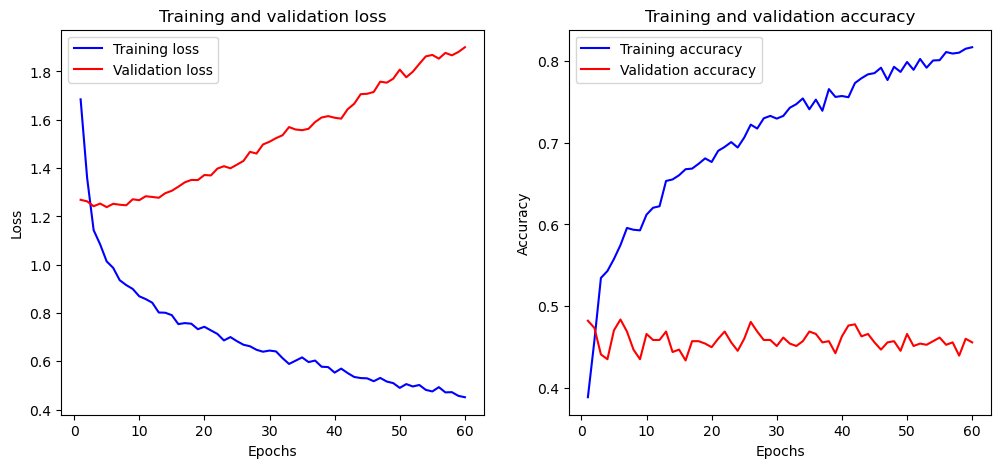

In [52]:
def plot_history(history):
    train_loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']
    train_acc_values = history.history['accuracy']
    val_acc_values = history.history['val_accuracy']
    epochs = range(1, len(train_loss_values) + 1)

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc_values, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

#### Overall Accuracy and F1-Score for Task B

In [53]:
# Predict classes for the test set
y_pred_prob = model.predict(test_vecs_w2v)

# Convert y_pred to 1D array
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("ccuracy:", accuracy)
print("F1 Score:", f1)


22/22 [==============================] - 0s 935us/step
Overall Accuracy: 0.43529411764705883
F1 Score: 0.43970138618194354


In [54]:
# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.50      0.18      0.27        60
           1       0.51      0.58      0.54       318
           2       0.43      0.38      0.40       238
           3       0.38      0.17      0.24        64

   micro avg       0.48      0.44      0.45       680
   macro avg       0.45      0.33      0.36       680
weighted avg       0.47      0.44      0.44       680
 samples avg       0.44      0.44      0.44       680



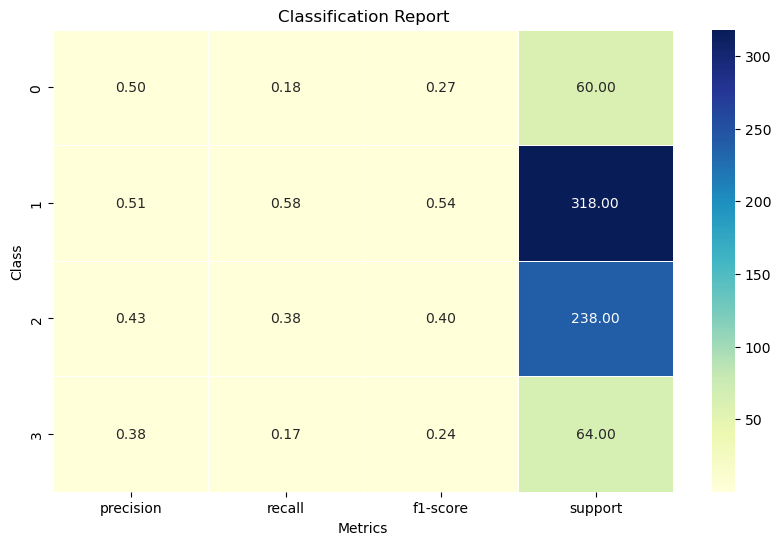

In [56]:
# Sample classification report data
report_data = {
    "precision": [0.50, 0.51, 0.43, 0.38],
    "recall": [0.18, 0.58, 0.38, 0.17],
    "f1-score": [0.27, 0.54, 0.40, 0.24],
    "support": [60, 318, 238, 64]
}

# Convert the data into a DataFrame
df_report = pd.DataFrame(report_data, index=["0", "1", "2", "3"])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

   # Project Ends Here